In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [2]:
file = 'output396603349669.dat'
df = pd.read_table(file, delim_whitespace=True, comment='#',
                  names=['Z', 'log(age/yr)', 'M_ini', 'M_act', 'logL/Lo', 'logTe', 'logG', 
                         'mbol', 'Kepler', 'g', 'r', 'i', 'z', 'DDO51_finf', 'int_IMF', 'stage'])

Text(0.5,0,'$g-i$')

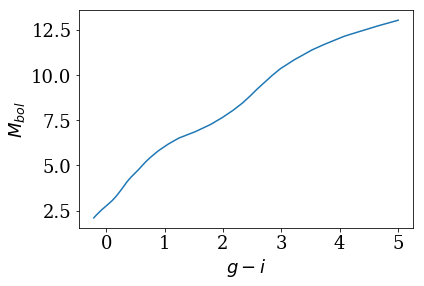

In [3]:
ms = (df['stage'] <= 1) & (df['mbol'] > 2)
plt.plot(df['g'][ms] - df['i'][ms], df['mbol'][ms])
plt.ylabel('$M_{bol}$')
plt.xlabel('$g-i$')
# plt.ylim(15,-3)


Text(0,0.5,'$M_{bol}$')

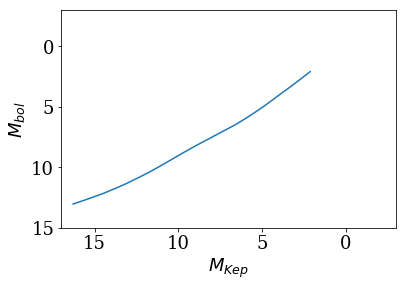

In [4]:
plt.plot(df['Kepler'][ms], df['mbol'][ms])
plt.xlim(17,-3)
plt.ylim(15,-3)
plt.xlabel('$M_{Kep}$')
plt.ylabel('$M_{bol}$')

# plt.savefig('figure.png', dpi=150, bbox_inches='tight', pad_inches=0.25)

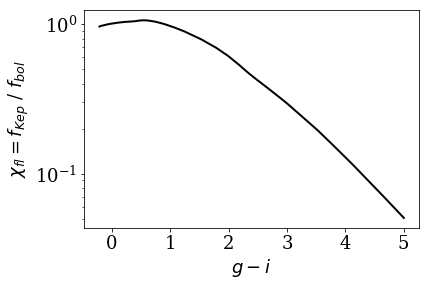

In [5]:
fkep_fbol = 10**(0.4 * (df['mbol'][ms] - df['Kepler'][ms]))

plt.plot(df['g'][ms] - df['i'][ms], fkep_fbol, lw=2, c='k')
plt.ylabel(r'$\chi_{fl} = f_{Kep}$ / $f_{bol}$')
plt.xlabel('$g-i$')
plt.yscale('log')

plt.savefig('../flare_chi.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

[-0.00129193  0.02105752 -0.14589187  0.10493256  0.00440871]


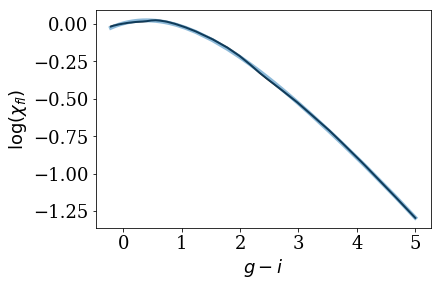

In [6]:
# try fitting w/ a polynomial

plt.plot(df['g'][ms] - df['i'][ms], np.log10(fkep_fbol), lw=2, c='k')
plt.ylabel(r'$\log( \chi_{fl} )$')
plt.xlabel('$g-i$')
# plt.yscale('log')

fit = np.polyfit(df['g'][ms] - df['i'][ms], np.log10(fkep_fbol), deg=4)
plt.plot(df['g'][ms] - df['i'][ms], np.polyval(fit, df['g'][ms] - df['i'][ms]), lw=4, alpha=0.5)

print(fit)
# plt.savefig('../flare_chi.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

[-0.00129193  0.02105752 -0.14589187  0.10493256  0.00440871]


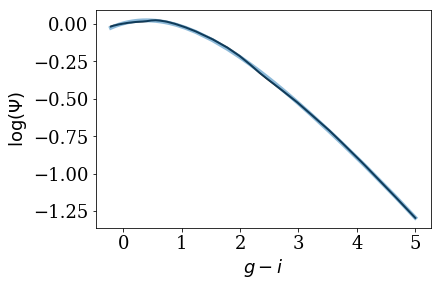

In [11]:
# try fitting w/ a polynomial

plt.plot(df['g'][ms] - df['i'][ms], np.log10(fkep_fbol), lw=2, c='k')
plt.ylabel(r'$\log( \Psi )$')
plt.xlabel('$g-i$')
# plt.yscale('log')

fit = np.polyfit(df['g'][ms] - df['i'][ms], np.log10(fkep_fbol), deg=4)
plt.plot(df['g'][ms] - df['i'][ms], np.polyval(fit, df['g'][ms] - df['i'][ms]), lw=4, alpha=0.5)

print(fit)
plt.savefig('../flare_psi.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)

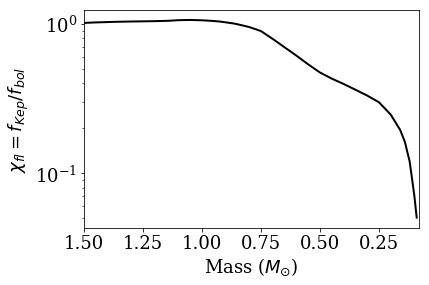

In [8]:
plt.plot(df['M_act'][ms], fkep_fbol, lw=2, c='k')
plt.ylabel(r'$\chi_{fl} = f_{Kep} / f_{bol}$')
plt.xlabel('Mass ($M_{\odot}$)')
plt.yscale('log')
plt.xlim(1.5, 0.08)

plt.savefig('../flare_chi_mass.pdf', dpi=150, bbox_inches='tight', pad_inches=0.25)